# Métodos cerrados de optimización

## Sección Dorada

Es similar al método de la bisección porque necesita un $x_l$ y $x_u$. Para hallar la posición de los puntos $x_1$ y $x_2$, se usa la sección dorada.

El objetivo de usar la sección dorada, es ahorrar costos computacionales porque con ella se logra hacer la menor cantidad de operaciones. Es decir, con la sección dorada, no se calcula el máximo ni el mínimo sino la posición de $x_1$ y $x_2$.

<img src="https://github.com/BioAITeamLearning/Metodos_2023_03_UAM/blob/main/_static/images/dorado.png?raw=true"/>


$$
l_0 = l_1 + l_2
$$

$$
\frac{l_1}{l_0} = \frac{l_2}{l_1}
$$

$$
\frac{l_1}{l_1 + l_2} = \frac{l_2}{l_1}
$$

$$
\frac{l_1}{l_2} = \frac{l_1 + l_2}{l_1}
$$

$$
\frac{l_1}{l_2} = 1+ \frac{l_2}{l_1}
$$

Hacemos $R = \frac{l_2}{l_1}$

$$
\frac{1}{R} = 1 + R
$$

$$
1 = R (1 + R)
$$

$$
1 = R + R^2
$$

$$
0 = -1 + R + R^2
$$

Resolvamos por formula cuadrática

$a = 1$, $b = 1$, $c=-1$

$$
R = \frac{-1 ± \sqrt{1+4}}{2}
$$

$$
R = \frac{-1 ± \sqrt{5}}{2}
$$

Tomando solo el positivo:

$$
R = \frac{\sqrt{5}-1}{2}
$$

$$
R = 0.61803
$$

R es la sección dorada, este valor permite que las proporciones sean óptimas.
Su recíproco da el número de oro.

$$
R^{-1} = 1.61803
$$

<img src="https://static.filadd.com/files/f%2317954/html/external_resources/bg8.png"/>

### Algoritmo de la sección dorada

A) calcular d como:

$$
d = R(x_u - x_l)
$$

B) Calculamos $x_1$ y $x_2$ con la formula:

$$
x_1 = x_l + d
$$

$$
x_2 = x_u - d
$$

Siempre $x_1 > x_2$ por la sección dorada.

C)
1. Si $f(x_1) > f(x_2)$, el máximo está entre $x_2$ y $x_u$. Entonces, $x_l = x_2$, $x_2 = x_1$, $x_0 = x_1$ y se recalcula $x_1 = x_l + d$
2. Si $f(x_1) < f(x_2)$, el máximo está entre $x_l$ y $x_1$. Entonces, $x_u = x_1$, $x_1 = x_2$, $x_0 = x_2$ y se recalcula $x_2 = x_u - d$

D) Repetir hasta convergencia.

Ahora se ve la ventaja de la sección dorada porqeu no hay que recalcular todos los pintos sino solo uno (1)

#### Error relativo

$$
e_r = (1-R)*|\frac{x_u - x_l}{x_{0}}| * 100\%
$$

### Ejercicio

Buscar el máximo de:

$$
f(x) = 2\sin(x) - \frac{x^2}{10}
$$

En el intervalo $x_l=0$ y $x_u=4$ con una tolerancia del 1%

In [86]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definición de la función
x = sp.symbols('x')
f = 2*sp.sin(x) - ((x**2)/10)

# Intervalo inicial
xl, xu = 0, 4

(-1.0, 5.0)

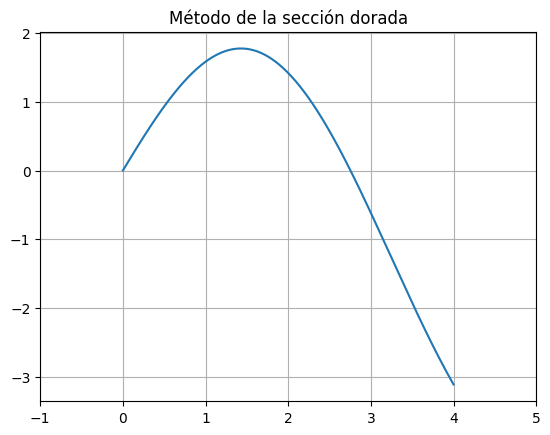

In [87]:
# Veamos como queda la gráfica a la que vamos a calcularle el máximo

fig, ax = plt.subplots()

t = np.linspace(xl,xu,400)
y = [f.subs({x:xi}) for xi in t]
ax.plot(t,y)
ax.grid()
ax.set_title("Método de la sección dorada")
ax.set_xlim(xl-1,xu+1)

In [88]:
# Tolerancia (criterio de parada)
tol = 1
R = (np.sqrt(5)-1)/2 # Proporción áurea
error = tol + 1 # Inicializamos el error con un valor mayor que la tolerancia
it = 1 # Número de iteración
x0 = 0.01 # óptimo posible.

In [89]:
columnas = ['xl', 'xu', 'x1', 'x2', 'f(x1)', 'f(x2)', 'x0', 'error(%)']
tabla = pd.DataFrame(columns=columnas)

In [90]:
d = R*(xu-xl)
x1 = xl + d
x2 = xu - d

fx1 = round(f.subs({x:x1}),4)
fx2 = round(f.subs({x:x2}),4)

data = {'xl':[xl], 'xu':[xu], 'x1':[x1], 'x2':[x2], 'f(x1)':[fx1], 'f(x2)':[fx2], 'x0':[x0], 'error(%)':[round(error,2)]}


In [91]:
error = (1-R)*np.abs((xu-xl)/x0)*100


if fx1 > fx2:
  xl = x2
  x2 = x1
  x0 = x1
  x1 = xl + d
elif fx1 < fx2:
  xu = x1
  x1 = x2
  x0 = x2
  x2 = xu - d


data['x0'] = [x0]
data['error(%)'] = [error]


fila = pd.DataFrame(data = data)
tabla = pd.concat([tabla,fila],ignore_index=True)
tabla.head()

,xl,xu,x1,x2,f(x1),f(x2),x0,error(%)
0,0,4,2.472136,1.527864,0.6300,1.7647,1.527864,15278.64045


In [92]:
## Siguiente interación

d = R*(xu-xl)
x1 = xl + d
x2 = xu - d

fx1 = round(f.subs({x:x1}),4)
fx2 = round(f.subs({x:x2}),4)

data = {'xl':[xl], 'xu':[xu], 'x1':[x1], 'x2':[x2], 'f(x1)':[fx1], 'f(x2)':[fx2], 'x0':[x0], 'error(%)':[round(error,2)]}
error = (1-R)*np.abs((xu-xl)/x0)*100


if fx1 > fx2:
  xl = x2
  x2 = x1
  x0 = x1
  x1 = xl + d
elif fx1 < fx2:
  xu = x1
  x1 = x2
  x0 = x2
  x2 = xu - d


data['x0'] = [x0]
data['error(%)'] = [error]


fila = pd.DataFrame(data = data)
tabla = pd.concat([tabla,fila],ignore_index=True)
tabla.head()

,xl,xu,x1,x2,f(x1),f(x2),x0,error(%)
0,0,4,2.472136,1.527864,0.6300,1.7647,1.527864,15278.640450
1,0,2.472136,1.527864,0.944272,1.7647,1.5310,1.527864,61.803399


In [93]:
## Siguiente interación

d = R*(xu-xl)
x1 = xl + d
x2 = xu - d

fx1 = round(f.subs({x:x1}),4)
fx2 = round(f.subs({x:x2}),4)

data = {'xl':[xl], 'xu':[xu], 'x1':[x1], 'x2':[x2], 'f(x1)':[fx1], 'f(x2)':[fx2], 'x0':[x0], 'error(%)':[round(error,2)]}
error = (1-R)*np.abs((xu-xl)/x0)*100


if fx1 > fx2:
  xl = x2
  x2 = x1
  x0 = x1
  x1 = xl + d
elif fx1 < fx2:
  xu = x1
  x1 = x2
  x0 = x2
  x2 = xu - d


data['x0'] = [x0]
data['error(%)'] = [error]


fila = pd.DataFrame(data = data)
tabla = pd.concat([tabla,fila],ignore_index=True)
tabla.head()

,xl,xu,x1,x2,f(x1),f(x2),x0,error(%)
0,0,4,2.472136,1.527864,0.6300,1.7647,1.527864,15278.640450
1,0,2.472136,1.527864,0.944272,1.7647,1.5310,1.527864,61.803399
2,0.944272,2.472136,1.888544,1.527864,1.5432,1.7647,1.527864,38.196601


In [94]:
## Siguiente interación

d = R*(xu-xl)
x1 = xl + d
x2 = xu - d

fx1 = round(f.subs({x:x1}),4)
fx2 = round(f.subs({x:x2}),4)

data = {'xl':[xl], 'xu':[xu], 'x1':[x1], 'x2':[x2], 'f(x1)':[fx1], 'f(x2)':[fx2], 'x0':[x0], 'error(%)':[round(error,2)]}
error = (1-R)*np.abs((xu-xl)/x0)*100


if fx1 > fx2:
  xl = x2
  x2 = x1
  x0 = x1
  x1 = xl + d
elif fx1 < fx2:
  xu = x1
  x1 = x2
  x0 = x2
  x2 = xu - d


data['x0'] = [x0]
data['error(%)'] = [error]


fila = pd.DataFrame(data = data)
tabla = pd.concat([tabla,fila],ignore_index=True)
tabla.head()

,xl,xu,x1,x2,f(x1),f(x2),x0,error(%)
0,0,4,2.472136,1.527864,0.6300,1.7647,1.527864,15278.640450
1,0,2.472136,1.527864,0.944272,1.7647,1.5310,1.527864,61.803399
2,0.944272,2.472136,1.888544,1.527864,1.5432,1.7647,1.527864,38.196601
3,0.944272,1.888544,1.527864,1.304952,1.7647,1.7595,1.527864,23.606798


## Actividad

Realizar el ajuste del algoritmo para que corra con cualquier tipo de función y para modificar sus límites y tolerancia.

Finalmente, realice la versión del algoritmo que sea capaz de determinar el valor mínimo de una función ya que en este ejemplo solo hallamos el máximo de las funciones.

In [95]:
## TU CÓDIGO VA ACÁ

## HASTA ACÁ